In [1]:
import pandas as pd
import torch as t

from master_thesis.core.utils.reproducibility import seed_everything
from master_thesis.core.separability.calinski_harabasz_index import (
    CalinskiHarabaszIndex,
)

DEVICE = "cuda"
PROMPT_TYPE = "few_shot"
POSITIVE_TOKEN = "true"
NEGATIVE_TOKEN = "false"
MODEL = "LLAMA_2_7B_CHAT"

DATA_DIR = "../../../../data"
DATASETS_DIR = f"{DATA_DIR}/datasets/base_experiments/europe_vs_usa/train"

In [2]:
seed_everything()

### Label aspect

In [3]:
label_activations_dir = f"{DATA_DIR}/activations/{MODEL}/base_experiments/europe_vs_usa/train/few_shot_label_aspect"
label_aspect_df = pd.read_csv(f"{DATASETS_DIR}/label_aspect.csv")

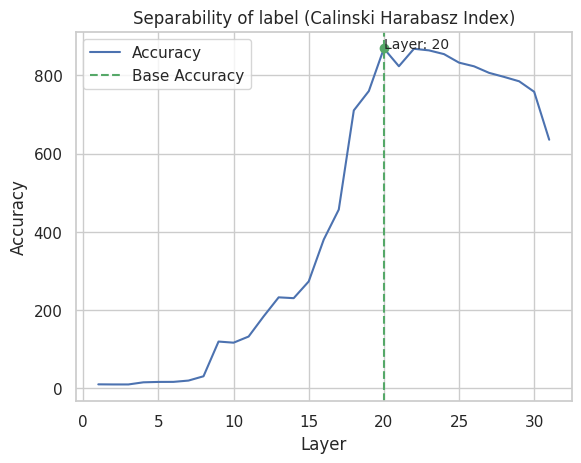

In [4]:
linear_model_separability = CalinskiHarabaszIndex(
    activations_dir=label_activations_dir,
    dataset=label_aspect_df,
    aspect="label",
    layers=range(1, 32),
)

linear_model_separability.plot_separability_score(
    show=True, save_path=".cache/calinski_harabasz/label_aspect.png"
)

### Confounding aspect

In [5]:
confounding_activations_dir = f"{DATA_DIR}/activations/{MODEL}/base_experiments/europe_vs_usa/train/few_shot_confounding_aspect"
confounding_aspect_df = pd.read_csv(f"{DATASETS_DIR}/confounding_aspect.csv")

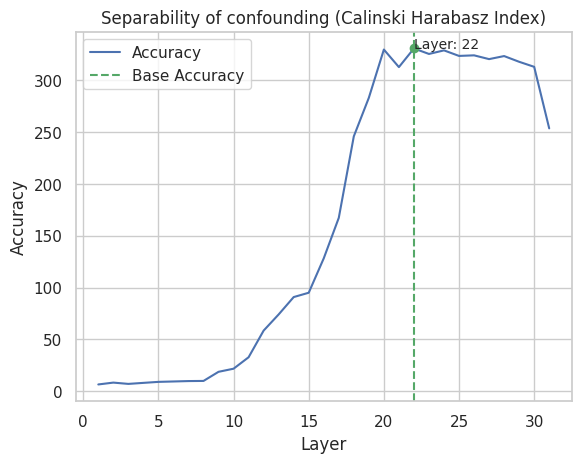

In [6]:
linear_model_separability = CalinskiHarabaszIndex(
    activations_dir=confounding_activations_dir,
    dataset=confounding_aspect_df,
    aspect="confounding",
    layers=range(1, 32),
)

linear_model_separability.plot_separability_score(
    show=True, save_path=".cache/calinski_harabasz/confounding_aspect.png"
)